Student Performance Indicator

Life Cycle of Machine Learning Project

1. Understanding the problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose Best model


1) Problem Statement

This project understands  how the student's performance (test score) is affected  by other variables such as  Gender, Ethinicity,Parental level of Education, Lunch and Test Prepation course.

Import Data and required packages



In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import CSV data as Pandas Data Frame

In [5]:
df = pd.read_csv('data/stud.csv')

Show top 5 records

In [7]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


shape of dataset

In [8]:
df.shape

(1000, 8)

Data Check to perform

1. Check Missing Values
2. Check Duplicates
3. Check data type
4. Check the unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorical column

Check Missin values

In [10]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values

Check Duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

There are no duplicates value in the data set

Checking the number of unique values of each column

In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Check data types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Check statistics of dataset

In [16]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight

* From above description of numerical data, all means are very close to each other - between 66 and 68.06
* All standard deviation are also close - between 14.6 - 15.19
* While there is minimum score 0 for math, for writin minimum is much higher=10 and for reading yet higher =17

Exploring Data

In [23]:
print("Categories in 'Gender' variable: ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' varaible: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:  ",end=" ")
print(df['parental_level_of_education'].unique())


print("Categories in 'lunch' variable :",end = " ")
print(df['lunch'].unique())


print("Categories in 'test_preparation_course' variable:  ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'Gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' varaible:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable : ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:   ['none' 'completed']


In [24]:
#Define Numerical & categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns

print("we have {} numerical features: {}".format(len(numeric_features),numeric_features))
print("\nwe have {} categorical features: {}".format(len(categorical_features),categorical_features))


we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns for Total Score and "Average"

In [25]:
df["Total_score"] = df['math_score']+df['reading_score'] + df['writing_score']
df["Average"] = df['Total_score'] / 3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [33]:
reading_full = df[df['reading_score']==100]['Average'].count()
math_full = df[df['math_score']==100]['Average'].count()
writing_full = df[df['writing_score']==100]['Average'].count()


print(f'Number of Student with full marks in math: {math_full}')
print(f'Number of Student with full marks in reading: {reading_full}')
print(f'Number of Student with full marks in writing: {writing_full}')


Number of Student with full marks in math: 7
Number of Student with full marks in reading: 17
Number of Student with full marks in writing: 14


In [34]:
reading_less_20 = df[df['reading_score']<20]['Average'].count()
math_less_20 = df[df['math_score']<20]['Average'].count()
writing_less_20 = df[df['writing_score']<20]['Average'].count()

print(f'Number of student who scored less than 20 marks in reading: {reading_less_20}')
print(f'Number of student who scored less than 20 marks in math: {math_less_20}')
print(f'Number of student who scored less than 20 marks in writing: {writing_less_20}')



Number of student who scored less than 20 marks in reading: 1
Number of student who scored less than 20 marks in math: 4
Number of student who scored less than 20 marks in writing: 3


Exploring Data (Visulization)

Visulize average score distribution to make some conclusion.

1. Histogram
2. Kernel Distribution Function (KDE)

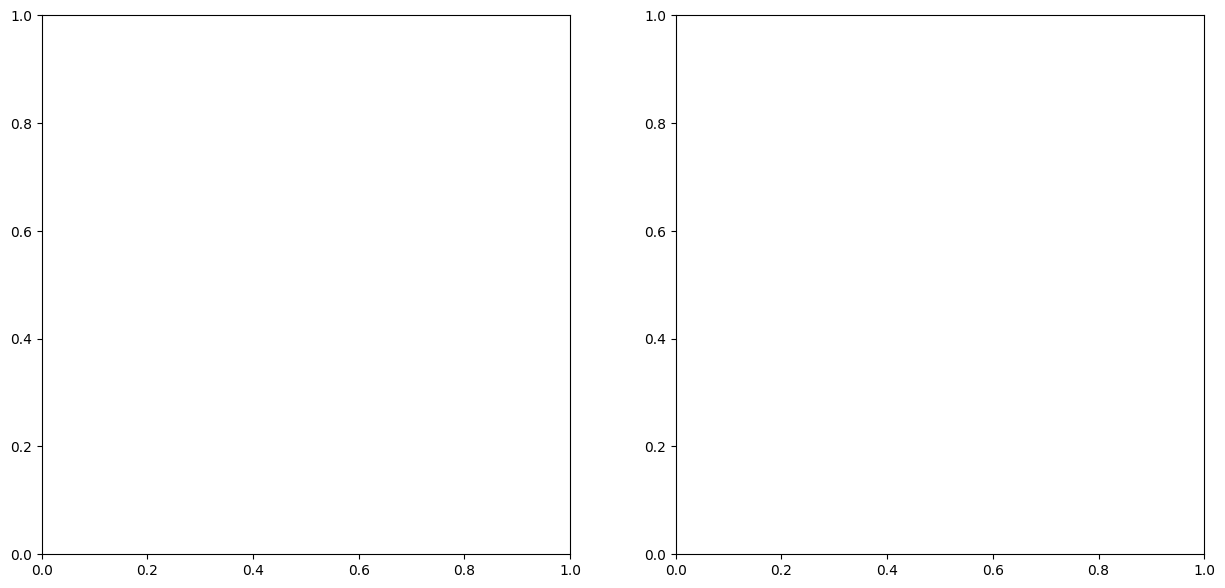

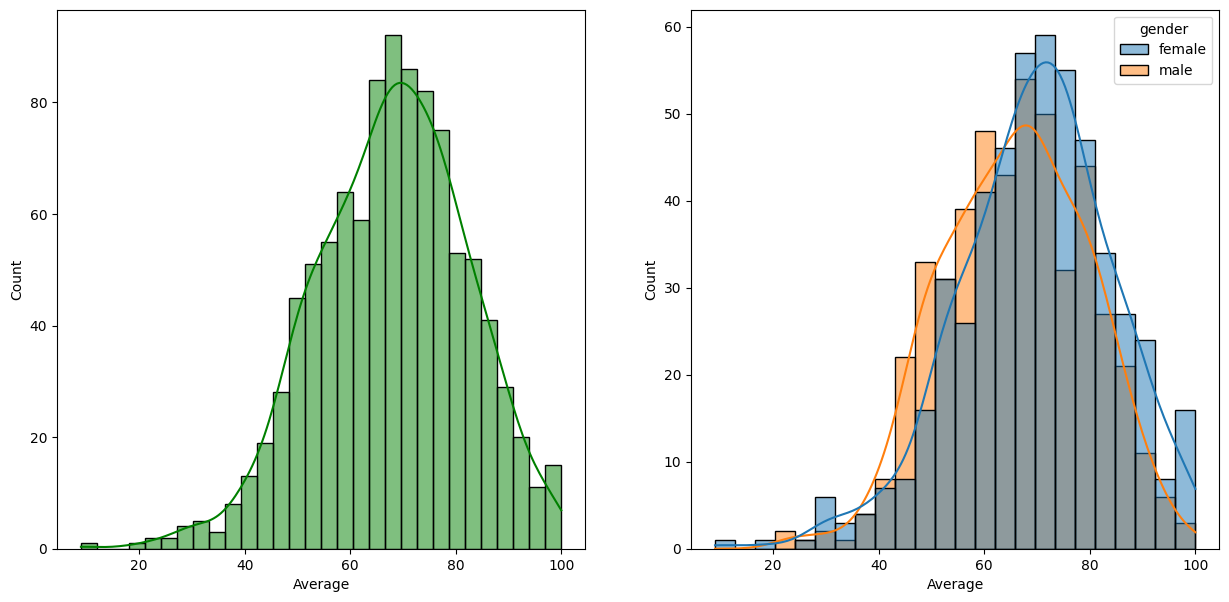

In [36]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x = 'Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average',kde=True,hue='gender')
plt.show()

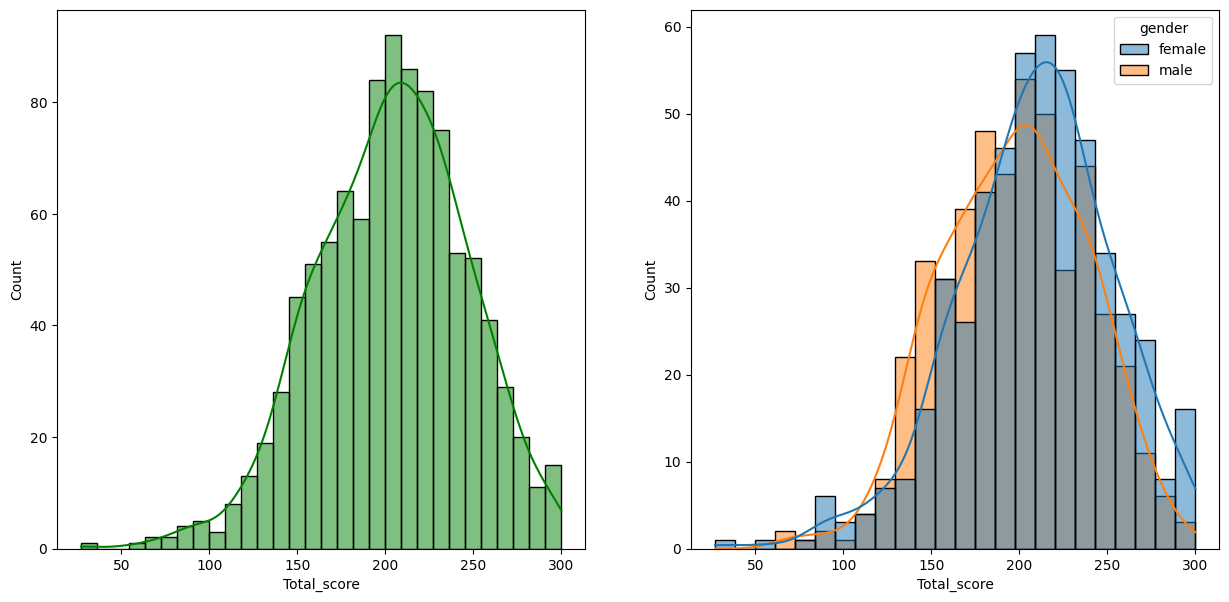

In [37]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x = 'Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='Total_score',kde=True,hue='gender')
plt.show()

Insights

Female students tend to perform well than male students

In [1]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

NameError: name 'plt' is not defined

Insights

1. Standard lunch helps perform well
2. Standard lunch helps perform well in exam be it male or female